# Clustering and K-Means

## What is Clustering?
Clustering adalah teknik pengelompokan data tanpa label (**unsupervised learning**) di mana objek dalam kelompok (cluster) memiliki kesamaan sifat yang tinggi, sementara objek antar-cluster memiliki perbedaan yang signifikan, Tujuannya:
- Memahami struktur data.
- Mengidentifikasi pola tersembunyi.
- Segmentasi (pelanggan, dokumen, gambar).

**Jenis Clustering**:
- **Centroid-based**: K-Means, K-Medoids.
- **Density-based**: DBSCAN.
- **Hierarchical**: Agglomerative Clustering.
- **Distribution-based**: Gaussian Mixture Models (GMM).

## K-Means Clustering
- Setiap cluster direpresentasikan oleh **centroid** (titik pusat).
- Algoritma berusaha meminimalkan **inertia** (jumlah kuadrat jarak tiap titik ke centroid).

1. **Pilih Jumlah Cluster (K)**: Misal, K=3.
2. **Inisialisasi Centroid**: Pilih K titik acak sebagai centroid awal.
3. **Assignment Phase**:
   - Setiap titik data dihitung jaraknya ke semua centroid.
   - Titik dialokasikan ke cluster dengan centroid **terdekat** (biasanya *jarak Euclidean*).
   - **Rumus Jarak Euclidean**:
     $$
     d(x, \mu_k) = \sqrt{\sum_{i=1}^n (x_i - \mu_{ki})^2}
     $$
4. **Update Phase**:
   - Hitung ulang centroid sebagai rata-rata semua titik dalam cluster:
     $$
     \mu_k^{(new)} = \frac{1}{|C_k|} \sum_{x \in C_k} x
     $$
5. **Iterasi**: Ulangi langkah 2 sampai n-1 atau:
   - Centroid tidak berubah.
   - Maksimum iterasi tercapai.

## Inertia (Cluster Quality)
Inertia adalah total **jumlah kuadrat jarak** setiap titik data ke centroid clusternya. Semakin kecil inertia, semakin "padat" cluster.

**Rumus**:

$$
\text{Inertia} = \sum_{i=1}^n \min_{\mu_k} ||x_i - \mu_k||^2
$$

**Interpretasi**:
- Inertia rendah → Cluster rapat (titik dekat dengan centroid).
- Inertia tinggi → Cluster renggang.

**Paradoks Inertia**:
- Jika K = jumlah data → Inertia = 0 (semua titik adalah centroid).
- **Masalah**: Bagaimana memilih K yang optimal?

## Elbow Method
1. Hitung inertia untuk berbagai nilai K (misal: K = 1 hingga K = n-1).
2. Plot **Inertia vs. K**.
3. Cari "siku" (*elbow*) di mana penurunan inertia melambat drastis.

Jika Grafik menurun tajam saat K=1→3, lalu landai saat K>3 → Pilih K=3.

**Keterbatasan**:
- Tidak selalu jelas di mana "siku" berada.
- Subjektif → Butuh metode pelengkap seperti **Silhouette Analysis**.

## Silhouette Analysis
**A. Konsep Cohesion & Separation**
- **Cohesion (a(i))**: Rata-rata jarak titik ke sesama anggota cluster.
  - *Semakin kecil a(i)* → Cluster semakin padat.
- **Separation (b(i))**: Rata-rata jarak titik ke cluster terdekat.
  - *Semakin besar b(i)* → Cluster terpisah dengan baik.

**B. Rumus Silhouette Score**
Untuk satu titik data $ x_i $:

$$
s(i) = \frac{b(i) - a(i)}{\max\{a(i), b(i)\}}
$$

- **Rentang**: $-1 \leq s(i) \leq 1$.
- **Interpretasi**:
  - $ s(i) \approx 1 $: Titik cocok dengan clusternya.
  - $ s(i) \approx 0 $: Titik berada di perbatasan dua cluster.
  - $ s(i) \approx -1 $: Titik salah cluster.

**Silhouette Score Global**:
Rata-rata $ s(i) $ untuk semua titik.

**C. Analisis Silhouette Plot**
- **Bilah Horizontal**: Menunjukkan distribusi $ s(i) $ tiap cluster.
- **Lebar Bilah**: Semakin lebar → Cluster lebih homogen.
- **Tinggi Rata-Rata**: Semakin tinggi → Kualitas cluster lebih baik.

## Evaluasi Tabel

| Keyword | Definisi | Purpose | Rumus |
|---------|----------|---------|-------|
| **Clustering**| Teknik `unsupervised learning` untuk mengelompokkan data berdasarkan kesamaan. | Memahami struktur data, segmentasi, identifikasi pola.| Tidak ada rumus tunggal; bergantung pada algoritma (K-Means, DBSCAN, Hierarchical).|
| **K-Means** | Algoritma clustering berbasis centroid dengan meminimalkan inertia.| Membagi data ke dalam K cluster yang homogen. | $\mu_k^{(new)} = \frac{1}{\|C_k\|} \sum_{x \in C_k} x$ |
| **Centroid** | Titik pusat cluster (rata-rata semua titik dalam cluster). | Menjadi representasi pusat cluster untuk perhitungan jarak. | $\mu_k = \text{rata-rata titik dalam cluster}$ |
| **Inertia** | Total jumlah kuadrat jarak titik ke centroid clusternya.| Mengukur kepadatan cluster (semakin kecil, semakin baik). | $\text{Inertia} = \sum_{i=1}^n \min_{\mu_k} \|x_i - \mu_k\|^2$  |
| **Silhouette**| Skor yang mengukur seberapa baik titik cocok dengan clusternya. | Menilai kualitas cluster dengan mempertimbangkan cohesion dan separation. | $s(i) = \frac{b(i) - a(i)}{\max\{a(i), b(i)\}}$ |

**1. Clustering vs. K-Means**:
* Clustering adalah konsep umum.
  - Kelebihan:
    - Tidak perlu label.
    - Cocok untuk eksplorasi data.
  - Kekurangan:
    - Subjektif dalam pemilihan jumlah cluster.
    - Sensitif terhadap noise.
* K-Means adalah salah satu algoritmanya.
  - Kelebihan:
    - Cepat dan efisien.
    - Mudah diimplementasikan.
  - Kekurangan
    - Harus tentukan K manual.
    - Sensitif terhadap inisialisasi centroid awal.

**2. Inertia vs. Silhouette**:
* Inertia fokus pada kepadatan cluster.
  - Kelebihan:
    -  Metrik kualitas cluster yang sederhana.
  - Kekurangan:
    -  Tidak bekerja baik untuk cluster non-spherical.
    -  Paradoks K = jumlah data.
* Silhouette mempertimbangkan pemisahan antar-cluster.
  - Kelebihan:
    - Objektif (rentang -1 hingga 1).
    - Mempertimbangkan struktur cluster.
  - Kekurangan
    - Komputasi lebih intensif.
    - Tidak efektif untuk cluster density-based.

**3. Centroid vs. Medoid**:
* Centroid adalah titik rata-rata.
* medoid adalah titik aktual dalam data.

In [44]:
import os
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sqlalchemy import create_engine
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [45]:
try:
  mysql_url = os.getenv("MYSQL_URL")
  postgres_url = os.getenv("POSTGRES_URL")
  mysql_engine = create_engine(mysql_url)
  postgres_engine = create_engine(postgres_url)
  df_mysql = pd.read_sql("SELECT * FROM iris_mysql",mysql_engine)
  df_postgres = pd.read_sql("SELECT * FROM iris_postgre ORDER BY id",postgres_engine)

  df_postgres = df_postgres.drop(columns=["class"])
  df_iris = df_mysql.merge(df_postgres, on="id")
  df_iris.to_csv("iris_combined.csv", index=False)
  print(df_iris)

except Exception as e:
  print(f"Error message: {e}")

finally:
  mysql_engine.dispose()
  postgres_engine.dispose()

      id           class  petal length  petal width  sepal length  sepal width
0      1     Iris-setosa          86.4         70.0          20.1         30.5
1      2     Iris-setosa           1.4          0.2           4.9          3.0
2      3     Iris-setosa           1.3          0.2           4.8          3.2
3      4     Iris-setosa           1.5          0.2           4.6          3.1
4      5     Iris-setosa           1.4          0.2           5.0          3.6
..   ...             ...           ...          ...           ...          ...
145  146  Iris-virginica           5.2          2.3           6.7          3.0
146  147  Iris-virginica           5.0          1.9           6.3          2.5
147  148  Iris-virginica           5.2          2.0           6.5          3.0
148  149  Iris-virginica           5.4          2.3           6.2          3.4
149  150  Iris-virginica           5.1          1.8           5.9          3.0

[150 rows x 6 columns]


In [46]:
# Data dengan outlier (seperti petal length = 86.4)
df_raw = pd.read_csv("iris_combined.csv")
X_raw = df_raw.drop(columns=["id", "class"])  # Kolom yang tidak digunakan
print(X_raw)

     petal length  petal width  sepal length  sepal width
0            86.4         70.0          20.1         30.5
1             1.4          0.2           4.9          3.0
2             1.3          0.2           4.8          3.2
3             1.5          0.2           4.6          3.1
4             1.4          0.2           5.0          3.6
..            ...          ...           ...          ...
145           5.2          2.3           6.7          3.0
146           5.0          1.9           6.3          2.5
147           5.2          2.0           6.5          3.0
148           5.4          2.3           6.2          3.4
149           5.1          1.8           5.9          3.0

[150 rows x 4 columns]


In [47]:
df_clean = pd.read_csv("iris_cleaned.csv") # Tugas 4 Naive Bayes
X_clean = df_clean.drop(columns=["id", "class"])
print(X_clean)

     petal length  petal width  sepal length  sepal width
0             1.4          0.2           4.9          3.0
1             1.3          0.2           4.8          3.2
2             1.5          0.2           4.6          3.1
3             1.4          0.2           5.0          3.6
4             1.7          0.4           5.4          3.9
..            ...          ...           ...          ...
137           5.2          2.3           6.7          3.0
138           5.0          1.9           6.3          2.5
139           5.2          2.0           6.5          3.0
140           5.4          2.3           6.2          3.4
141           5.1          1.8           5.9          3.0

[142 rows x 4 columns]


In [48]:
scaler = StandardScaler()
X_raw_scaled = scaler.fit_transform(X_raw)

results_raw = {}
for k in range(2, 5):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = kmeans.fit_predict(X_raw_scaled)
    sse = kmeans.inertia_
    silhouette = silhouette_score(X_raw_scaled, labels)
    results_raw[k] = {"SSE": sse, "Silhouette": silhouette}

print("=== Hasil Clustering dengan Outlier ===")
for k, metrics in results_raw.items():
    print(f"K={k}: SSE = {metrics['SSE']:.2f}, Silhouette = {metrics['Silhouette']:.2f}")

=== Hasil Clustering dengan Outlier ===
K=2: SSE = 67.73, Silhouette = 0.96
K=3: SSE = 24.86, Silhouette = 0.51
K=4: SSE = 14.51, Silhouette = 0.47


In [49]:
X_clean_scaled = scaler.fit_transform(X_clean)
results_clean = {}
for k in range(2, 5):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = kmeans.fit_predict(X_clean_scaled)
    sse = kmeans.inertia_
    silhouette = silhouette_score(X_clean_scaled, labels)
    results_clean[k] = {"SSE": sse, "Silhouette": silhouette}

print("\n=== Hasil Clustering Tanpa Outlier ===")
for k, metrics in results_clean.items():
    print(f"K={k}: SSE = {metrics['SSE']:.2f}, Silhouette = {metrics['Silhouette']:.2f}")


=== Hasil Clustering Tanpa Outlier ===
K=2: SSE = 195.83, Silhouette = 0.60
K=3: SSE = 124.29, Silhouette = 0.46
K=4: SSE = 98.43, Silhouette = 0.41


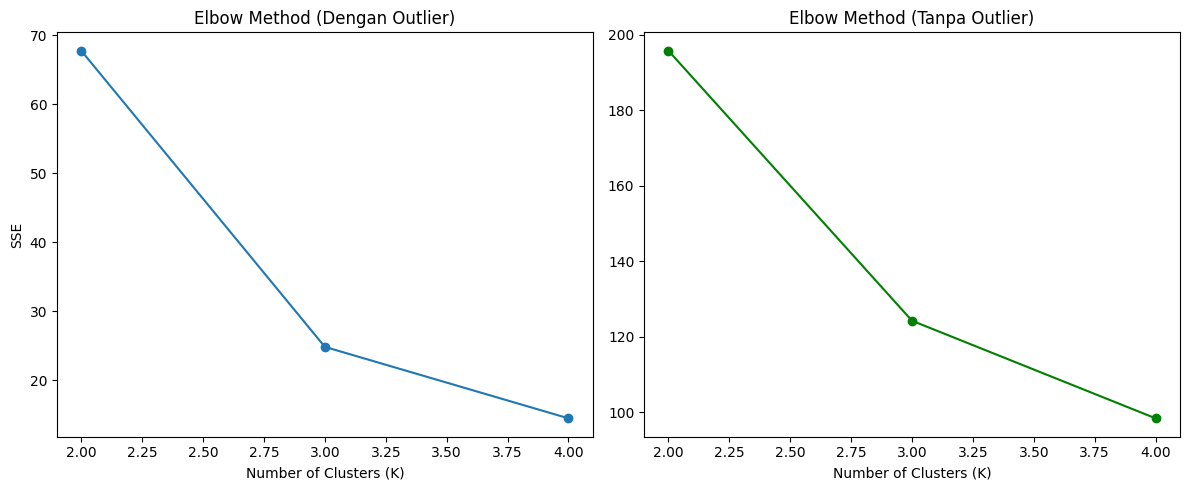

In [50]:
plt.figure(figsize=(12, 5))

# Plot Raw Data
plt.subplot(1, 2, 1)
plt.plot(list(results_raw.keys()), [m["SSE"] for m in results_raw.values()], marker='o')
plt.title("Elbow Method (Dengan Outlier)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("SSE")

# Plot Clean Data
plt.subplot(1, 2, 2)
plt.plot(list(results_clean.keys()), [m["SSE"] for m in results_clean.values()], marker='o', color='green')
plt.title("Elbow Method (Tanpa Outlier)")
plt.xlabel("Number of Clusters (K)")

plt.tight_layout()
# plt.savefig("elbow_comparison.png")
plt.show()

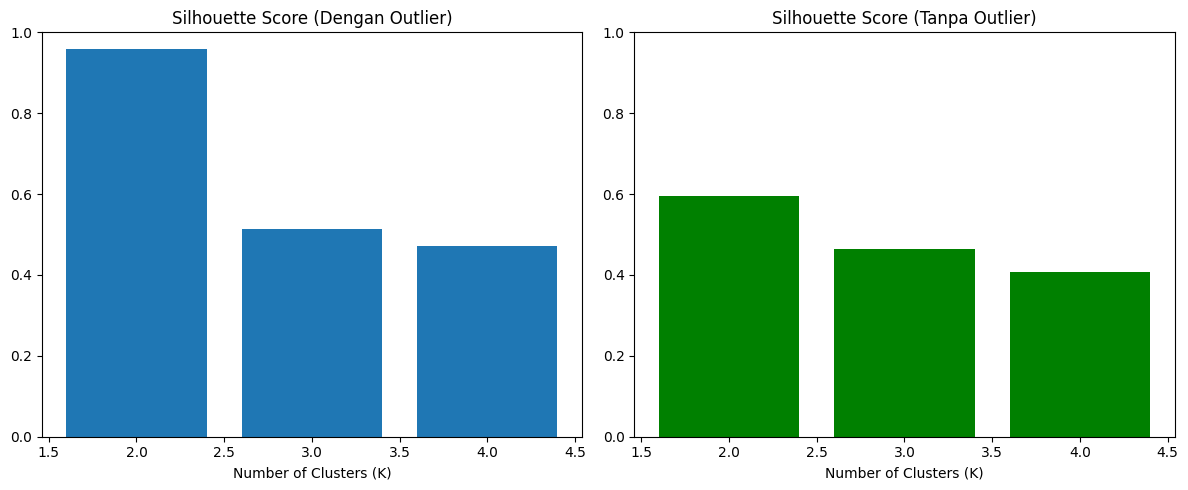

In [51]:
plt.figure(figsize=(12, 5))

# Plot Raw Data
plt.subplot(1, 2, 1)
plt.bar(list(results_raw.keys()), [m["Silhouette"] for m in results_raw.values()])
plt.title("Silhouette Score (Dengan Outlier)")
plt.xlabel("Number of Clusters (K)")
plt.ylim(0, 1)

# Plot Clean Data
plt.subplot(1, 2, 2)
plt.bar(list(results_clean.keys()), [m["Silhouette"] for m in results_clean.values()], color='green')
plt.title("Silhouette Score (Tanpa Outlier)")
plt.xlabel("Number of Clusters (K)")
plt.ylim(0, 1)

plt.tight_layout()
# plt.savefig("silhouette_comparison.png")
plt.show()

## Summary

Dengan Outlier:
- SSE lebih tinggi karena outlier meningkatkan jarak ke centroid.
- Silhouette lebih rendah karena outlier mengganggu struktur cluster.
- K optimal mungkin tidak terdeteksi dengan jelas.

Tanpa Outlier:
- SSE lebih rendah dan Silhouette lebih tinggi.
- Pola cluster lebih jelas (misal: K=2 atau K=3 optimal).

---

### **1. Clustering**
Clustering menggunakan algoritma **K-Means** (unsupervised learning untuk pengelompokan data).
```python
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
labels = kmeans.fit_predict(X_scaled)
```

### **2. K-Means**
- Algoritma K-Means dijalankan dengan menentukan jumlah cluster (`n_clusters`),
- inisialisasi centroid (`n_init`), dan random state untuk reproduktibilitas.
```python
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
labels = kmeans.fit_predict(X_scaled)
```


### **3. Inertia (SSE)**
Inertia `(Sum of Squared Errors)` diakses melalui atribut `inertia_` dari model K-Means.
```python
sse = kmeans.inertia_  # Inertia = SSE
```

### **4. Silhouette Score**
Skor Silhouette dihitung menggunakan `silhouette_score` dari `sklearn.metrics`.
```python
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(X_scaled, labels)
```

### **5. Centroid vs Medoid**
- **Centroid**:
  - K-Means menggunakan **centroid** (rata-rata titik dalam cluster).
  - Centroid dapat diakses melalui `cluster_centers_`.
```python
centroids = kmeans.cluster_centers_  # Contoh: cetak centroid untuk K=3
print(centroids)
```

- **Medoid**:
  - Medoid adalah titik *aktual* dalam data yang paling dekat dengan centroid, digunakan di algoritma **K-Medoids**
  - Kode menggunakan K-Means (centroid-based), bukan K-Medoids (medoid-based).